# **Machine Learning** _Day 101_
##### Name: Muhammad Hassaan
##### Date: August 12, 2024
##### Email: muhammadhassaan7896@gmail.com

---

# DBSCAN vs. OPTICS: A Comparative Study

## Introduction

- **Purpose**: Compare DBSCAN (Density-Based Spatial Clustering of Applications with Noise) and OPTICS (Ordering Points To Identify the Clustering Structure) clustering algorithms.
- **Objective**: Understand their working principles, advantages, disadvantages, and suitable use cases.

## 1. Overview of DBSCAN

### 1.1 What is DBSCAN?

- **Definition**: A density-based clustering algorithm that groups points closely packed together and marks points in low-density regions as noise.
- **Key Parameters**:
  - **Eps**: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
  - **MinPts**: The number of points required to form a dense region.

### 1.2 How DBSCAN Works

- **Core Points**: Points that have at least `MinPts` within `Eps`.
- **Border Points**: Points that are within `Eps` of a core point but have fewer than `MinPts` in their neighborhood.
- **Noise Points**: Points that are not reachable from any core point.

### 1.3 Advantages

- Can find arbitrarily shaped clusters.
- Does not require specifying the number of clusters.
- Handles noise and outliers well.

### 1.4 Disadvantages

- Performance can degrade with high-dimensional data.
- Sensitive to the choice of `Eps` and `MinPts`.

## 2. Overview of OPTICS

### 2.1 What is OPTICS?

- **Definition**: An extension of DBSCAN that addresses its sensitivity to parameter selection and helps in identifying cluster structures of varying densities.
- **Key Parameters**:
  - **MinPts**: Same as in DBSCAN.
  - **MaxEps**: Maximum distance to consider for clustering.

### 2.2 How OPTICS Works

- **Ordering**: It creates an ordering of the data points based on their reachability distance, which helps in visualizing the clustering structure.
- **Reachability Plot**: A plot showing the reachability distance of each point, useful for identifying cluster structures.

### 2.3 Advantages

- Can handle varying densities better than DBSCAN.
- Produces a reachability plot, which can be used to determine the number of clusters and their structure.

### 2.4 Disadvantages

- More complex and computationally intensive compared to DBSCAN.
- Requires careful interpretation of the reachability plot.

## 3. Practical Comparison

### 3.1 Implementation and Usage

- **DBSCAN**: Easy to implement and understand. Suitable for datasets with relatively uniform density.
- **OPTICS**: More flexible in handling clusters of varying densities but requires understanding of the reachability plot.

### 3.2 Visualization

- **DBSCAN**: Visualization of clusters and noise.
- **OPTICS**: Visualization of the reachability plot to identify clusters and their structure.

### 3.3 Use Cases

- **DBSCAN**: Suitable for applications with well-defined, dense clusters and noisy data.
- **OPTICS**: Ideal for datasets with varying densities and when a detailed understanding of cluster structure is needed.

## 4. Code Examples

### 4.1 DBSCAN Example

```python
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
X = np.random.rand(100, 2)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()
```

### 4.2 OPTICS Example

```python
from sklearn.cluster import OPTICS
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
X = np.random.rand(100, 2)

# Apply OPTICS
optics = OPTICS(min_samples=5, max_eps=0.1)
labels = optics.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('OPTICS Clustering')
plt.show()
```

## 5. Conclusion

- **DBSCAN** is straightforward and effective for clustering with uniform density but struggles with varying densities.
- **OPTICS** offers a more nuanced approach to clustering by addressing the limitations of DBSCAN and visualizing the clustering structure.

## References

- Scikit-learn documentation for [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).
- Scikit-learn documentation for [OPTICS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html).

---


Text(0.5, 1.0, 'Synthetic Data')

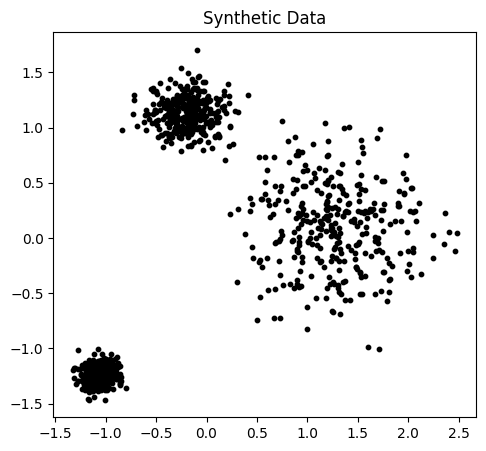

In [15]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler

# Generating synthetic data
n_samples = 1000
n_features = 2
n_clusters = 3

# Create a dataset with varying density clusters
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, cluster_std=[1.0, 2.5, 0.5], random_state=42)
X = StandardScaler().fit_transform(X)  # Scaling the data for better results

# Visualizing the synthetic data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=10, c='black')
plt.title('Synthetic Data')

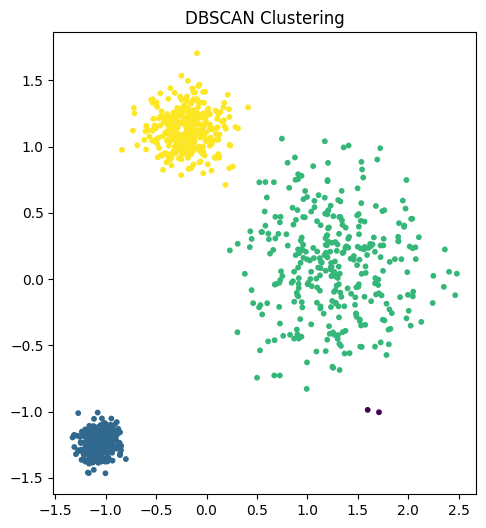

In [16]:
# 1. DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering')
plt.show()

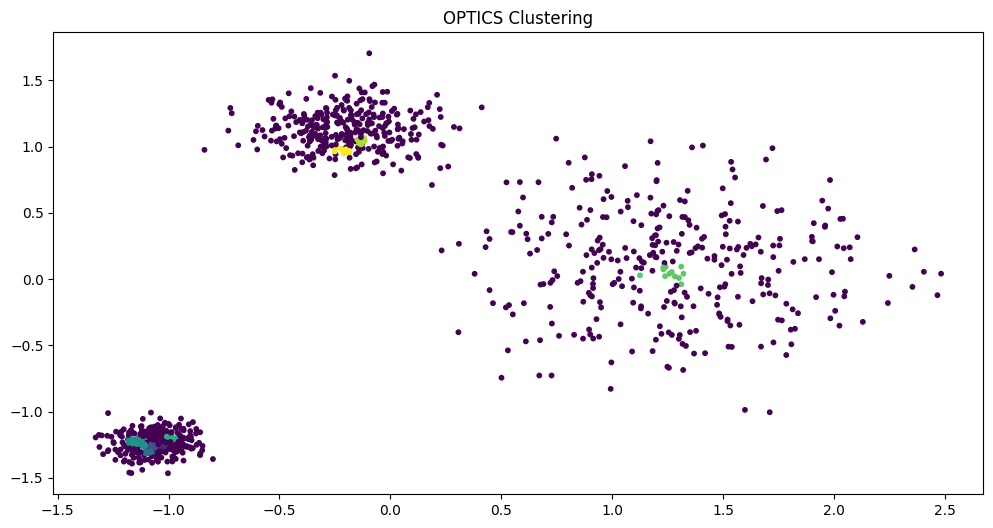

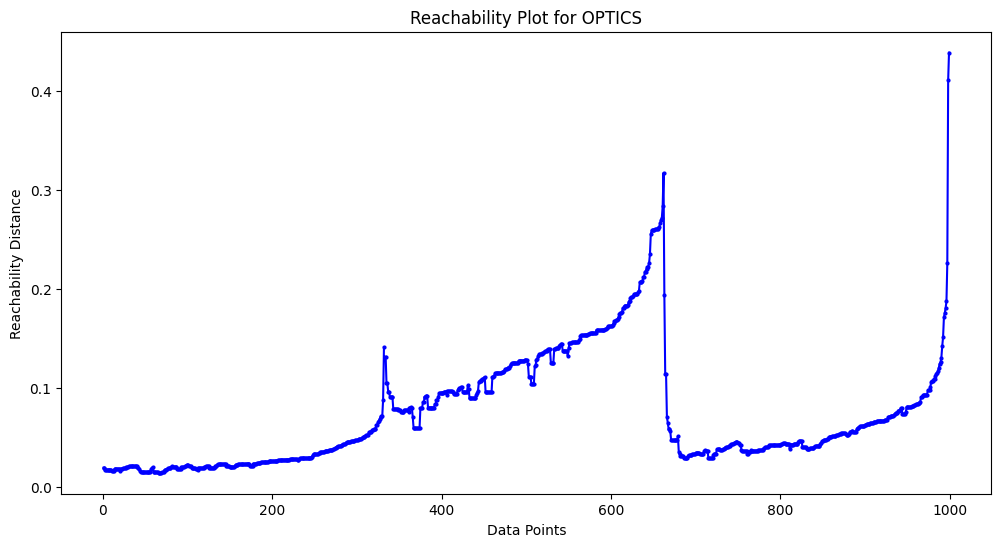

In [14]:
# 2. OPTICS Clustering
optics = OPTICS(min_samples=10, max_eps=0.5)
optics_labels = optics.fit_predict(X)

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=optics_labels, cmap='viridis', s=10)
plt.title('OPTICS Clustering')
plt.show()

# Plotting Reachability Plot for OPTICS
reachability = optics.reachability_[optics.ordering_]
plt.figure(figsize=(12, 6))
plt.plot(range(len(reachability)), reachability, 'b-', marker='o', markersize=2)
plt.title('Reachability Plot for OPTICS')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')
plt.show()